In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [16]:
#from google.colab import drive
#drive.mount('/content/drive')

In [17]:
#dataset = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/ear device/',shuffle=True,batch_size=25)
dataset = tf.keras.utils.image_dataset_from_directory('C:/Users/Asus/Ear Device/',shuffle=True,batch_size=25)

Found 2000 files belonging to 4 classes.


In [18]:
class_names = dataset.class_names

In [19]:
class_names

['earbuds', 'earphone', 'headphone', 'neckband']

In [20]:
def data_split(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size = 1000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 5)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds= ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [21]:
train_ds, val_ds, test_ds = data_split(dataset)

In [22]:
train_ds = train_ds.cache().shuffle(500).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(500).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(500).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [24]:
data_aug = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [25]:
#Model Building
model = models.Sequential([
    resize_rescale,
    data_aug,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape = (32,256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')
])
model.build(input_shape = (32,256,256,3))

In [26]:
model.compile(
            optimizer='adam', 
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False), 
            metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_ds, epochs=10, batch_size=30, verbose=1, validation_data=val_ds
)

Epoch 1/10
64/64 [==============================] - 82s 1s/step - loss: 3.6914 - accuracy: 0.3075 - val_loss: 1.3184 - val_accuracy: 0.3750
Epoch 2/10
64/64 [==============================] - 74s 1s/step - loss: 1.2715 - accuracy: 0.4025 - val_loss: 1.1447 - val_accuracy: 0.5000
Epoch 3/10
64/64 [==============================] - 74s 1s/step - loss: 1.1480 - accuracy: 0.4675 - val_loss: 1.1747 - val_accuracy: 0.3900
Epoch 4/10
64/64 [==============================] - 78s 1s/step - loss: 1.1780 - accuracy: 0.4581 - val_loss: 1.1140 - val_accuracy: 0.5500
Epoch 5/10
64/64 [==============================] - 85s 1s/step - loss: 1.1078 - accuracy: 0.4900 - val_loss: 1.0496 - val_accuracy: 0.4350
Epoch 6/10
64/64 [==============================] - 79s 1s/step - loss: 1.0922 - accuracy: 0.5213 - val_loss: 1.0889 - val_accuracy: 0.4500
Epoch 7/10
64/64 [==============================] - 77s 1s/step - loss: 1.0819 - accuracy: 0.5188 - val_loss: 1.0446 - val_accuracy: 0.5050
Epoch 8/10
64/64 [==

Original Label: earbuds
1/1 [==============================] - 0s 357ms/step
Predicted Image: earbuds


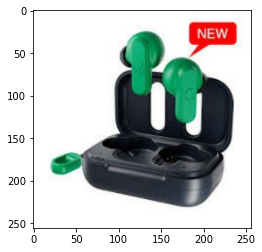

In [28]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[4].numpy().astype('uint8')
    first_label = labels_batch[4].numpy()
    plt.imshow(first_image)
    print("Original Label:", class_names[first_label])
    
    
    batch_predict = model.predict(images_batch)
    print('Predicted Image:', class_names[np.argmax(batch_predict[4])])